<a href="https://colab.research.google.com/github/Dabogkie/Elective2-Machine-Learning/blob/main/LOPEZ_Housing_Pricing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KENNETH REI M. LOPEZ

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt  
%matplotlib inline     
sns.set(color_codes=True)

In [6]:
df = pd.read_csv("Housing.csv")
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.tail(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [8]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [11]:
df = df.drop(['area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom', 'basement', ''], axis=1)
df.head(5)

,price,stories,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,3,no,yes,2,yes,furnished
1,12250000,4,no,yes,3,no,furnished
2,12250000,2,no,no,2,yes,semi-furnished
3,12215000,2,no,yes,3,yes,furnished
4,11410000,2,no,yes,2,no,furnished


In [13]:
df = df.rename(columns={'area': "AREA", 'bedrooms': "Rooms", 'bathrooms': "Shower", 'mainroad': "OpenRoad", 'guestroom': "DiningRoom", 'basement': "Otherroom"})
df.head(5)

,price,stories,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,3,no,yes,2,yes,furnished
1,12250000,4,no,yes,3,no,furnished
2,12250000,2,no,no,2,yes,semi-furnished
3,12215000,2,no,yes,3,yes,furnished
4,11410000,2,no,yes,2,no,furnished


In [14]:
df.shape

(545, 7)

In [15]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (43, 7)


In [16]:
df.count()

price               545
stories             545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [17]:
df = df.drop_duplicates()
df.head(5)

,price,stories,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,3,no,yes,2,yes,furnished
1,12250000,4,no,yes,3,no,furnished
2,12250000,2,no,no,2,yes,semi-furnished
3,12215000,2,no,yes,3,yes,furnished
4,11410000,2,no,yes,2,no,furnished


In [18]:
df.count()

price               502
stories             502
hotwaterheating     502
airconditioning     502
parking             502
prefarea            502
furnishingstatus    502
dtype: int64

In [19]:
print(df.isnull().sum())

price               0
stories             0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [20]:
df = df.dropna()    
df.count()

price               502
stories             502
hotwaterheating     502
airconditioning     502
parking             502
prefarea            502
furnishingstatus    502
dtype: int64

In [21]:
print(df.isnull().sum())  

price               0
stories             0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


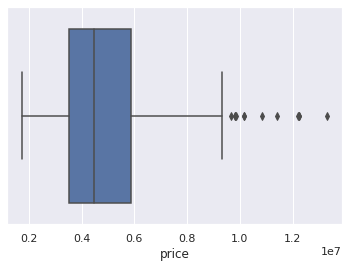

In [29]:
sns.boxplot(x=df['price'])

In [30]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price      2380000.0
stories          1.0
parking          1.0
dtype: float64


In [31]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(444, 7)

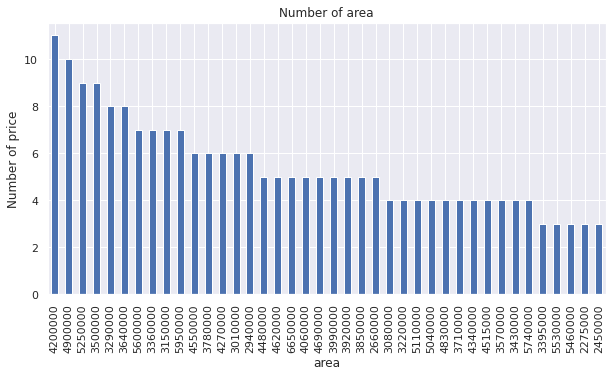

In [36]:
df.price.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of area")
plt.ylabel('Number of price')
plt.xlabel('area');

,price,stories,parking
price,1.000000,0.227334,0.328018
stories,0.227334,1.000000,-0.067311
parking,0.328018,-0.067311,1.000000


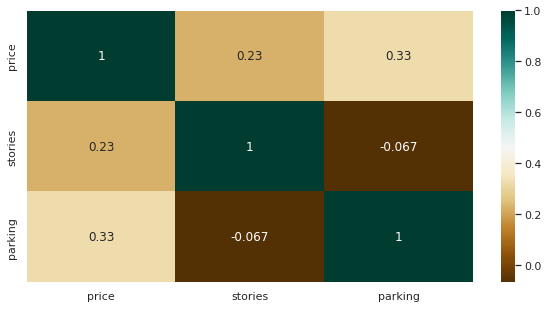

In [37]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

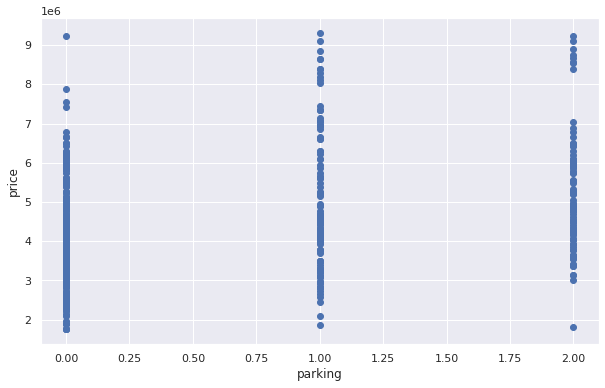

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['parking'], df['price'])
ax.set_xlabel('parking')
ax.set_ylabel('price')
plt.show()